# GMM Clustering on High-Dimensional Biomedical Data

This notebook extends the previous analysis by applying the EM algorithm for Gaussian Mixture Models (GMMs) to the full 30-dimensional Breast Cancer dataset, without PCA. The goal is to observe how model behavior changes in higher dimensions, and whether the initialization strategy (KMeans vs Random) has more impact when the data becomes more complex.


## 1. Load the full dataset (30 features)

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Create DataFrame for inspection and feature selection
df = pd.DataFrame(X, columns=feature_names)

# Select the 6 features with highest variance
top_features = df.var().sort_values(ascending=False).head(6).index
X = df[top_features].values

print("Selected features:", list(top_features))
print("Shape of subset:", X.shape)



Selected features: ['worst area', 'mean area', 'area error', 'worst perimeter', 'mean perimeter', 'worst texture']
Shape of subset: (569, 6)


## 2. Fit GMM with KMeans and Random initialization

In [9]:
from emgmm import GMM
from sklearn.metrics import adjusted_rand_score

gmm_kmeans = GMM(n_components=2, init_method="kmeans")
gmm_kmeans.fit(X)
labels_kmeans = gmm_kmeans.predict(X)
ari_kmeans = adjusted_rand_score(y, labels_kmeans)

gmm_random = GMM(n_components=2, init_method="random")
gmm_random.fit(X)
labels_random = gmm_random.predict(X)
ari_random = adjusted_rand_score(y, labels_random)

print(f"ARI (KMeans Init): {ari_kmeans:.3f}")
print(f"ARI (Random Init): {ari_random:.3f}")


ARI (KMeans Init): 0.761
ARI (Random Init): 0.761


## 3. Compare convergence and clustering quality

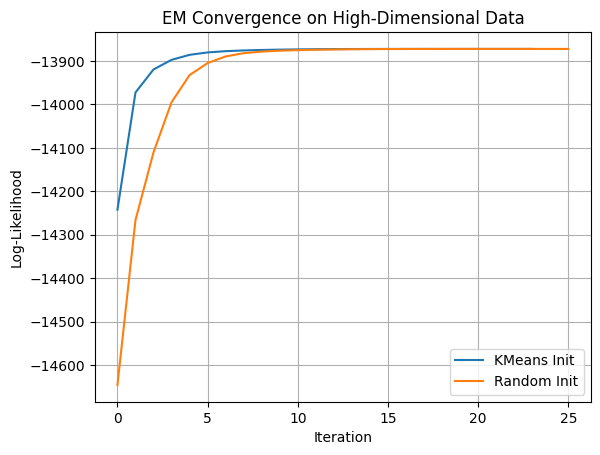

KMeans loglik: -13872.455113022119
Random loglik: -13872.455131112427


In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(gmm_kmeans.log_likelihood_, label="KMeans Init")
plt.plot(gmm_random.log_likelihood_, label="Random Init")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("EM Convergence on High-Dimensional Data")
plt.legend()
plt.grid(True)
plt.show()

print("KMeans loglik:", gmm_kmeans.log_likelihood_[-1])
print("Random loglik:", gmm_random.log_likelihood_[-1])


### GMM Convergence Using Top-Variance Features

To reduce dimensionality while preserving the most informative structure, we selected the six features with the highest variance in the dataset:  
`['worst area', 'mean area', 'area error', 'worst perimeter', 'mean perimeter', 'worst texture']`.

This plot shows the log-likelihood evolution over EM iterations when training the GMM with two different initialization strategies: KMeans and random. 

Although both methods converge to nearly identical final log-likelihood values, KMeans initialization reaches high likelihood values faster and stabilizes in fewer iterations. This highlights the advantage of using KMeans in terms of convergence speed, especially when the feature space remains moderately high-dimensional.


## 4. Summary and Interpretation

In this experiment, the EM algorithm is applied to high-dimensional data without PCA. Differences in initialization may become more significant as the dimensionality increases and the optimization landscape becomes more complex.

The results provide insight into whether GMM remains robust and stable in such cases, and whether initialization impacts convergence and clustering quality more than it did in the lower-dimensional scenario.
